## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [230]:
X = np.linspace(0, 20)
y = (-1 * X) + 2

#### Plot your data points. 

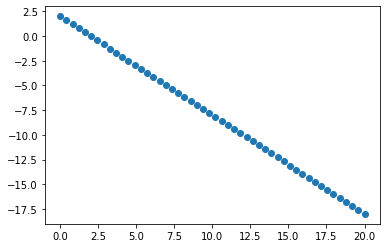

In [231]:
plt.scatter(X, y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

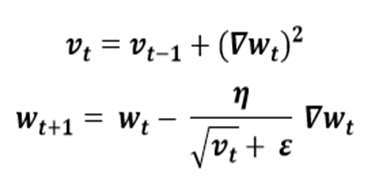

In [232]:
def gd_Adagrad(X, y, alpha, epsilon, iterations):
    theta_0 = 0
    theta_1 = 0
    theta0_list = []
    theta1_list = []
    m = len(y)
    J = []
    hyp_list = []
    v0 = 0
    v1 = 0
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)

        error = hyp - y
        cost = (1/(2*m)) * np.sum(error**2)
        J.append(cost)

        grad0 = np.sum(error) / m
        grad1 = np.sum(error * X) / m

        v0 = v0 + grad0**2
        v1 = v1 + grad1**2

        theta_0 = theta_0 - ((alpha * grad0) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha * grad1) / (np.sqrt(v1) + epsilon))
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        if abs(old_cost - cost) < 1e-3:
            break
        old_cost = cost
        counter += 1

    return J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter

In [271]:
J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter = gd_Adagrad(X, y, 0.1, 1e-8, 1000)
counter

369

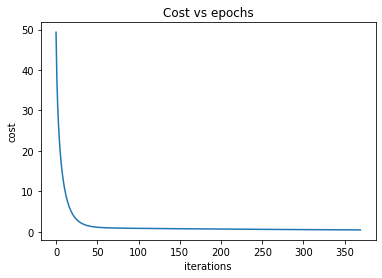

In [272]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

In [273]:
r2_score(y, hyp_list[-1])

0.9743306728197894

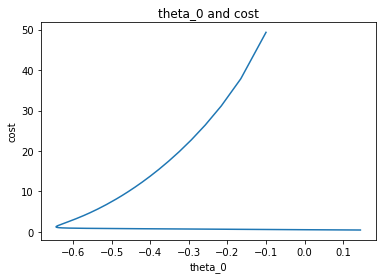

In [274]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

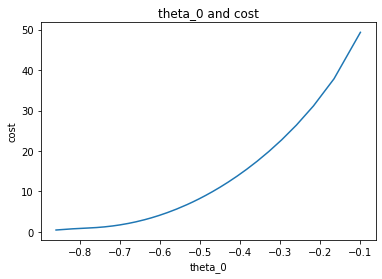

In [275]:
plt.plot(theta1_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

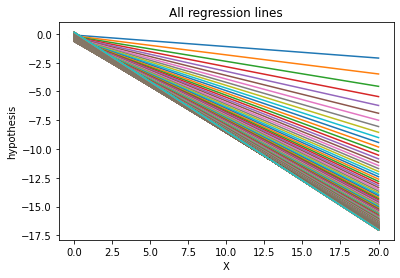

In [276]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

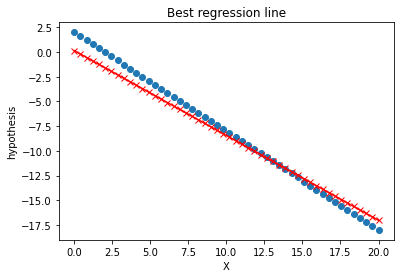

In [277]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

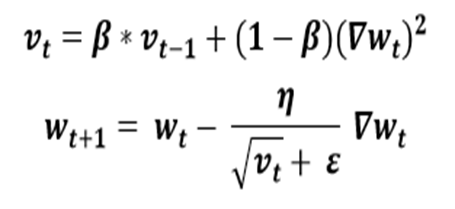

In [240]:
def gd_RMSProp(X, y, alpha, beta, epsilon, iterations):
    theta_0 = 0
    theta_1 = 0
    theta0_list = []
    theta1_list = []
    m = len(y)
    J = []
    hyp_list = []
    v0 = 0
    v1 = 0
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)

        error = hyp - y
        cost = (1/(2*m)) * np.sum(error**2)
        J.append(cost)

        grad0 = np.sum(error) / m
        grad1 = np.sum(error * X) / m

        v0 = (beta * v0) + ((1 - beta) * grad0**2)
        v1 = (beta * v1) + ((1 - beta) * grad1**2)

        theta_0 = theta_0 - ((alpha * grad0) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha * grad1) / (np.sqrt(v1) + epsilon))
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        if abs(old_cost - cost) < 1e-3:
            break
        old_cost = cost
        counter += 1

    return J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter

In [241]:
J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter = gd_RMSProp(X, y, 0.1, 0.9, 1e-8, 1000)
counter

65

In [242]:
r2_score(y, hyp_list[-1])

0.9996943820204022

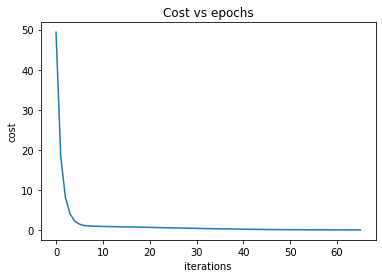

In [243]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

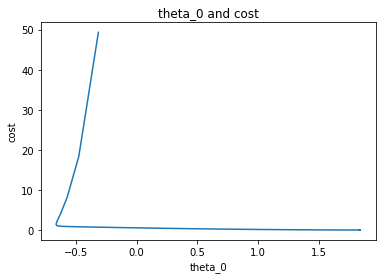

In [244]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

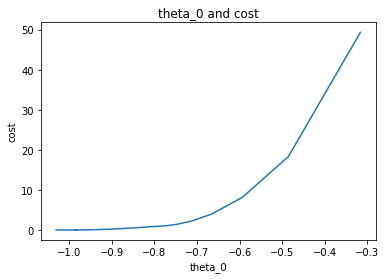

In [245]:
plt.plot(theta1_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

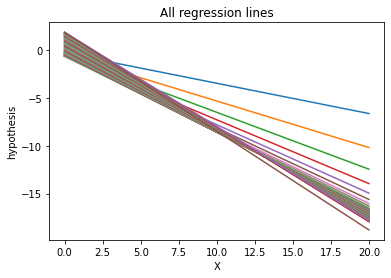

In [246]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

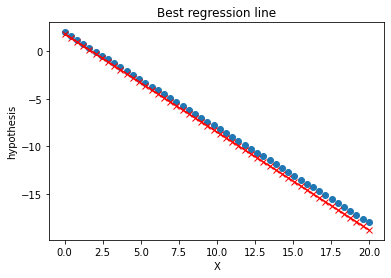

In [247]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

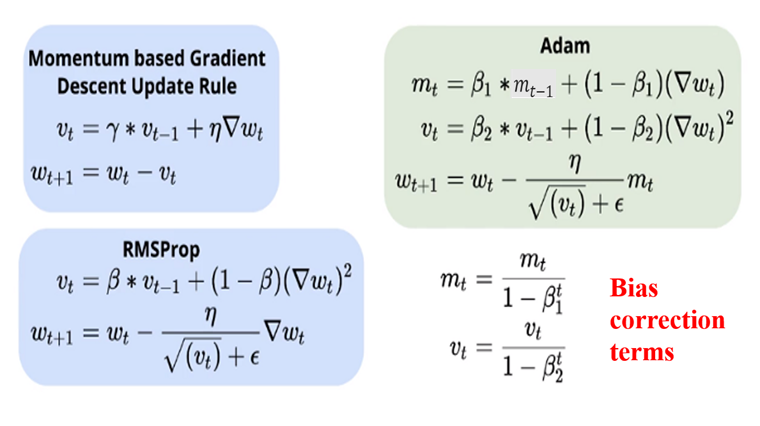

In [248]:
def gd_adam(X, y, alpha, beta1, beta2, epsilon, iterations):
    theta_0 = 0
    theta_1 = 0
    theta0_list = []
    theta1_list = []
    m = len(y)
    J = []
    hyp_list = []
    v0 = 0
    v1 = 0
    m_0 = 0
    m_1 = 0
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)

        error = hyp - y
        cost = (1/(2*m)) * np.sum(error**2)
        J.append(cost)

        grad0 = np.sum(error) / m
        grad1 = np.sum(error * X) / m

        m_0 = (beta1 * m_0) + ((1 - beta1) * grad0)
        m_1 = (beta1 * m_1) + ((1 - beta1) * grad1)

        v0 = (beta2 * v0) + ((1 - beta2) * grad0**2)
        v1 = (beta2 * v1) + ((1 - beta2) * grad1**2)

        theta_0 = theta_0 - ((alpha * m_0) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha * m_1) / (np.sqrt(v1) + epsilon))
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        if abs(old_cost - cost) < 1e-3:
            break
        old_cost = cost
        counter += 1

    return J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter

In [249]:
J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter = gd_adam(X, y, 0.1, 0.9, 0.8, 1e-8, 1000)
counter

136

In [250]:
r2_score(y, hyp_list[-1])

0.9998202499110719

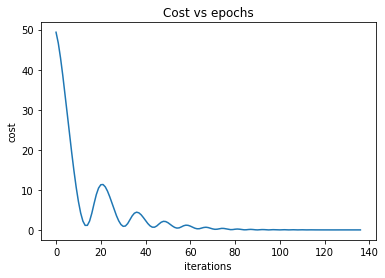

In [251]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

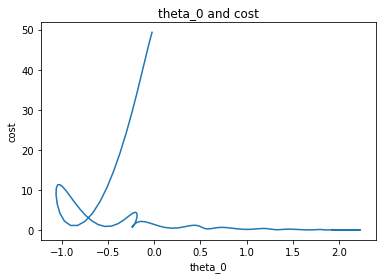

In [252]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

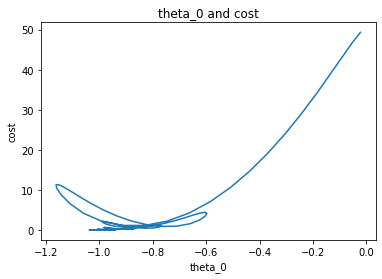

In [253]:
plt.plot(theta1_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

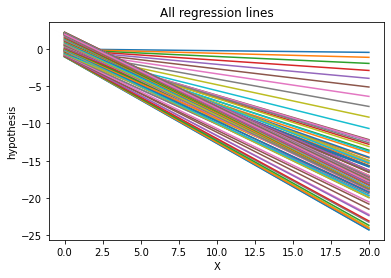

In [254]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

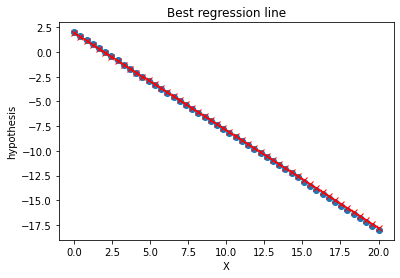

In [255]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");